# Naive Bayes

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns

from sklearn import metrics

from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
X_train_s = np.load('data/X_train_s.npy')
X_test_s = np.load('data/X_test_s.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')

### Perfomance evaluation

In [7]:
nb = naive_bayes.GaussianNB()

fit = nb.fit(X_train_s, y_train)
predicted = fit.predict(X_test_s)
train_eval_score = nb.score(X_train_s, y_train)
test_eval_score = nb.score(X_test_s, y_test)

print("Evaluation scores Train {:.3f} Test {:.3f}".format(train_eval_score, test_eval_score))

Evaluation scores Train 0.847 Test 0.849


In [8]:
def fit_predict_score(y_test, predicted):
    """Predicts the average accuracy score of a classifier clf and outputs a confusion matrix."""
    
    #cross tabulation of predicted and actual values produces the correlation matrix
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),4)
    plt.title("Confusion Matrix", fontsize = 12)
    plt.show()
    print("Accuracy Score: ",accuracy)
    print (metrics.classification_report(y_test,predicted))

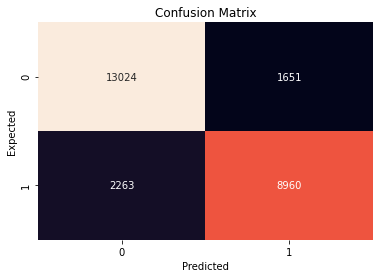

Accuracy Score:  0.8489
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     14675
           1       0.84      0.80      0.82     11223

    accuracy                           0.85     25898
   macro avg       0.85      0.84      0.85     25898
weighted avg       0.85      0.85      0.85     25898



In [9]:
fit_predict_score(y_test, predicted);

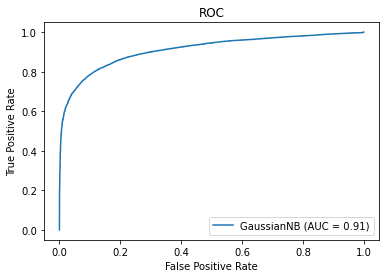

In [10]:
rf_roc = plot_roc_curve(nb, X_test_s, y_test)
plt.title("ROC")
plt.show()